https://www.kaggle.com/code/launay10christian/world-cup-prediction/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
world_cup = pd.read_csv('wc2020.csv')

In [4]:
results = pd.read_csv('results.csv')

In [5]:
world_cup.head()

,Team,Group,Previous \ntitles,Previous\n finals,Previous semifinals,Current FIFA Rank,first match,Match index,History with first Opponent,second match,match index.2,History with second Opponent,third match,match index.3,History with third Opponent
0,Ecuador,A,0,0,0,46,Qatar,1,0,Netherlands,17,-1.0,Senegal,33,-1.0
1,Netherlands,A,0,3,5,10,Senegal,2,NaN,Ecuador,17,1.0,Qatar,34,NaN
2,Qatar,A,0,0,0,51,Ecuador,1,0,Senegal,18,NaN,Netherlands,34,NaN
3,Senegal,A,0,0,0,20,Netherlands,2,n.a,Qatar,18,NaN,Ecuador,33,1.0
4,England,B,1,1,3,5,Iran,3,NaN,USA,19,6.0,Wales,35,54.0


In [6]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3
...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,Moldova,1
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,Latvia,2
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,Draw,0
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,Tunisia,3


In [8]:
schweiz = results[(results['home_team'] == 'Switzerland') | (results['away_team'] == 'Switzerland')]
swiss = schweiz.iloc[:]
swiss.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
166,1905-02-12,France,Switzerland,1,0,Friendly,Paris,France,False,France,1
207,1908-03-08,Switzerland,France,1,2,Friendly,Geneva,Switzerland,False,France,1
213,1908-04-05,Switzerland,Germany,5,3,Friendly,Basel,Switzerland,False,Switzerland,2
238,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,Germany,1
258,1910-04-03,Switzerland,Germany,2,3,Friendly,Basel,Switzerland,False,Germany,1


In [9]:
df = results[(results['home_team'] == 'France') | (results['away_team'] == 'France')]
france = df.iloc[:]
france.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
163,1904-05-01,Belgium,France,3,3,Friendly,Brussels,Belgium,False,Draw,0
166,1905-02-12,France,Switzerland,1,0,Friendly,Paris,France,False,France,1
175,1905-05-07,Belgium,France,7,0,Friendly,Brussels,Belgium,False,Belgium,7
185,1906-04-22,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,Belgium,5
200,1907-04-21,Belgium,France,1,2,Friendly,Brussels,Belgium,False,France,1


In [10]:
#creating a column for year and the first world cup was held in 1930
year = []
for row in france['date']:
    year.append(int(row[:4]))
france ['match_year']= year
france_1930 = france[france.match_year >= 1930]
france_1930.count()

date               793
home_team          793
away_team          793
home_score         793
away_score         793
tournament         793
city               793
country            793
neutral            793
winning_team       793
goal_difference    793
match_year         793
dtype: int64

<AxesSubplot:xlabel='France_Results', ylabel='count'>

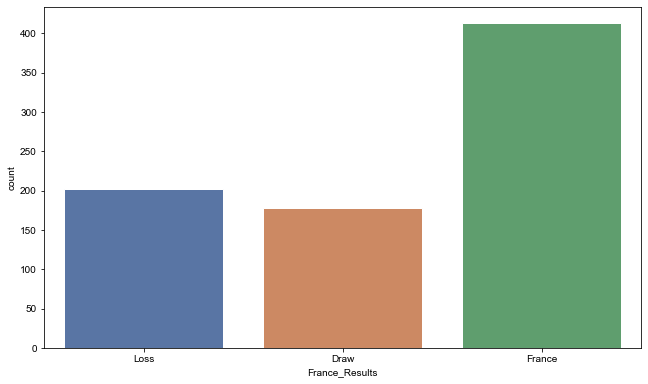

In [11]:
#what is the common game outcome for nigeria visualisation
wins = []
for row in france_1930['winning_team']:
    if row != 'France' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'France_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='France_Results', data=winsdf)

In [12]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', 'Cameroon', 'Canada', 
            'Ecuador', 'Ghana', ' Iran', 'Japan', 
            'Korea Republic', 'Saudi Arabia', 'Mexico', 
            'Netherlands', 'Qatar', 'USA', 'Wales', 
            'Morocco', 'Senegal', 'Tunisia', 'Costa Rica', 
            'Argentina', 'Brazil', 'Uruguay', 'Belgium', 
            'Croatia', 'Denmark', 'England', 'France', 
            'Germany', 'Poland', 'Portugal', 'Serbia', 
            'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21549
home_team          21549
away_team          21549
home_score         21549
away_score         21549
tournament         21549
city               21549
country            21549
neutral            21549
winning_team       21549
goal_difference    21549
dtype: int64

In [13]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,2
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,England,1


In [14]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1266,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,False,Spain,1,1930
1267,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,False,Portugal,1,1930
1273,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,False,Portugal,2,1930
1274,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Italy,2,1930
1276,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,False,Draw,0,1930


In [15]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
7,Wales,Scotland,False,Scotland
10,England,Wales,False,England


In [16]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,Wales,Scotland,False,0
4,England,Wales,False,2


In [17]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]

y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Try something other than logistic regression

In [19]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.577
Test set accuracy:  0.564


Above: Logreg is getting accuracy of:
Training set accuracy:  0.577
Test set accuracy:  0.564

and message reading:

- ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

- Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
- Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [20]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('2022_rank.csv')
# fixtures = pd.read_csv('wc2020.csv')
fixtures = pd.read_csv('schedule.csv')

rankings = ranking.drop_duplicates(subset='country_full',)
# List for storing the group stage games
pred_set = []

In [21]:
fixtures.head()

,index,round number,date,location,home team,away team,group,result
0,1,1,11/21/22,Doha,Netherlands,Senegal,A,NaN
1,2,1,11/21/22,Ar-Rayyan,Iran,England,B,NaN
2,3,1,11/21/22,Al Khor,Ecuador,Qatar,A,NaN
3,4,1,11/21/22,Ar-Rayyan,Wales,USA,B,NaN
4,5,1,11/22/22,Al Daayen,Saudi Arabia,Argentina,C,NaN


In [22]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['home team'].map(rankings.set_index('country_full',verify_integrity= True)['rank']))
fixtures.insert(2, 'second_position', fixtures['away team'].map(rankings.set_index('country_full')['rank']))

# We only need the group stage games, so we have to slice the dataset
# fixtures = fixtures.iloc[:48, :]

# because my fixtures is not complete yet ==> use 20 instead of 48
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,index,first_position,second_position,round number,date,location,home team,away team,group,result
43,44,31.0,12.0,3,12/1/22,Al Khor,Costa Rica,Germany,E,NaN
44,45,NaN,13.0,3,12/2/22,Al Wakrah,Ghana,Uruguay,H,NaN
45,46,NaN,8.0,3,12/2/22,Doha,Korea Republic,Portugal,H,NaN
46,47,25.0,14.0,3,12/2/22,Doha,Serbia,Switzerland,G,NaN
47,48,37.0,NaN,3,12/2/22,Al Daayen,Cameroon,Brazil,G,NaN


In [23]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['home team'], 'away_team': row['away team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['away team'], 'away_team': row['home team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,home_team,away_team,winning_team
0,Netherlands,Senegal,None
1,England,Iran,None
2,Ecuador,Qatar,None
3,USA,Wales,None
4,Argentina,Saudi Arabia,None


In [24]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_31893/3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0




Here are the results of group stages.


In [25]:
#group matches 
predictions = logreg.predict(pred_set)

winners = []
for i in range(fixtures.shape[0]):
    print(f'{backup_pred_set.iloc[i, 1]} and {backup_pred_set.iloc[i, 0]}')
    
    if predictions[i] == 2:
        print(f'Winner: {backup_pred_set.iloc[i, 0]}')
        winners.append(backup_pred_set.iloc[i, 0])
        
    elif predictions[i] == 1:
        print("Draw")
        
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 1])
        winners.append(backup_pred_set.iloc[i, 1])
        
    print(f'Probability of {backup_pred_set.iloc[i, 1]} winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print(f'Probability of {backup_pred_set.iloc[i, 0]} winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print("")
#     print(winners)


Senegal and Netherlands
Winner: Netherlands
Probability of Senegal winning:  0.089
Probability of Draw:  0.242
Probability of Netherlands winning:  0.670

Iran and England
Winner: England
Probability of Iran winning:  0.077
Probability of Draw:  0.241
Probability of England winning:  0.682

Qatar and Ecuador
Winner: Ecuador
Probability of Qatar winning:  0.119
Probability of Draw:  0.252
Probability of Ecuador winning:  0.629

Wales and USA
Winner: Wales
Probability of Wales winning:  0.468
Probability of Draw:  0.185
Probability of USA winning:  0.347

Saudi Arabia and Argentina
Winner: Argentina
Probability of Saudi Arabia winning:  0.022
Probability of Draw:  0.123
Probability of Argentina winning:  0.855

Tunisia and Denmark
Winner: Denmark
Probability of Tunisia winning:  0.111
Probability of Draw:  0.261
Probability of Denmark winning:  0.628

Poland and Mexico
Winner: Mexico
Probability of Poland winning:  0.203
Probability of Draw:  0.266
Probability of Mexico winning:  0.531



### Group A
1. Netherlands
2. Senegal

### Group B
1. England
2. Wales


### Group C
1. Argentina
2. Mexico

### Group D
1. France
2. Denmark

### Group E
1. Spain
2. Germany

### Group F
1. Belgium
2. Croatia

### Group G
1. Brazil
2. Switzerland

### Group H
1. Portugal
2. Uruguay

In [28]:
# List of tuples before 
group_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Spain', 'Russia'),
            ('France', 'Mexico'),
            ('England', 'Germany'),
            ('Portugal', 'Switzerland')]



# Errors in code below

In [29]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        print(match)
        positions.append(rankings.loc[rankings['country_full'] == match[0],'rank'].loc['rank'])
        positions.append(rankings.loc[rankings['country_full'] == match[1],'rank'].iloc[0])

    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}
                # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [30]:
clean_and_predict(group_16, ranking, final, logreg)

('Netherlands', 'Wales')


KeyError: 'rank'

In [ ]:
# List of matches
quarters = [('England', 'Wales'),
            ('France', 'Argentina'),
            ('Brazil', 'Portugal'),
            ('Spain', 'Belgium')]

In [ ]:
# List of matches
semi = [('England', 'France'),
            ('Brazil', 'Spain')]

In [ ]:
finals = [('Brazil', 'France')]